<a href="https://colab.research.google.com/github/M768251/spyder/blob/master/Copia_de_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller

In [ ]:
# prompt: importar fifa_playerspt.xlsx a un data frame de pandas la primera fila son los titulos

import pandas as pd
#from google.colab import drive
#drive.mount('/content/drive')

# Reemplaza 'ruta/a/tu/archivo.xlsx' con la ruta real de tu archivo en Google Drive
file_path = '/content/fifa_players.xlsx'

try:
  df = pd.read_excel(file_path, header=1) # header=0 indica que la primera fila contiene los nombres de las columnas
except FileNotFoundError:
  print(f"Error: El archivo no se encontró en la ruta especificada: {file_path}")
except Exception as e:
  print(f"Error al importar el archivo: {e}")


In [ ]:
df.head()

,name,full_name,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),national_team,national_rating
0,L. Messi,Lionel Andrés Messi Cuccittini,31,170.18,72.1,Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Argentina,82.0
1,C. Eriksen,Christian Dannemann Eriksen,27,154.94,76.2,Denmark,88,89,69500000.0,205000.0,Right,3,5,4,Denmark,78.0
2,P. Pogba,Paul Pogba,25,190.50,83.9,France,88,91,73000000.0,255000.0,Right,4,4,5,France,84.0
3,L. Insigne,Lorenzo Insigne,27,162.56,59.0,Italy,88,88,62000000.0,165000.0,Right,3,4,4,Italy,83.0
4,K. Koulibaly,Kalidou Koulibaly,27,187.96,88.9,Senegal,88,91,60000000.0,135000.0,Right,3,3,2,NaN,NaN


In [ ]:
# prompt: calcula y muestra la correlacion entre la wage_euro y overall_rating e interpretala

correlation = df['wage_euro'].corr(df['overall_rating'])
print(f"La correlación entre wage_euro y overall_rating es: {correlation}")

# Interpretación
if correlation > 0.5:
  print("Existe una fuerte correlación positiva entre el salario y la puntuación general.")
elif correlation > 0:
  print("Existe una correlación positiva moderada entre el salario y la puntuación general.")
elif correlation < -0.5:
  print("Existe una fuerte correlación negativa entre el salario y la puntuación general.")
elif correlation < 0:
    print("Existe una correlación negativa moderada entre el salario y la puntuación general.")
else:
  print("No existe una correlación significativa entre el salario y la puntuación general.")


La correlación entre wage_euro y overall_rating es: 0.577316213868706
Existe una fuerte correlación positiva entre el salario y la puntuación general.


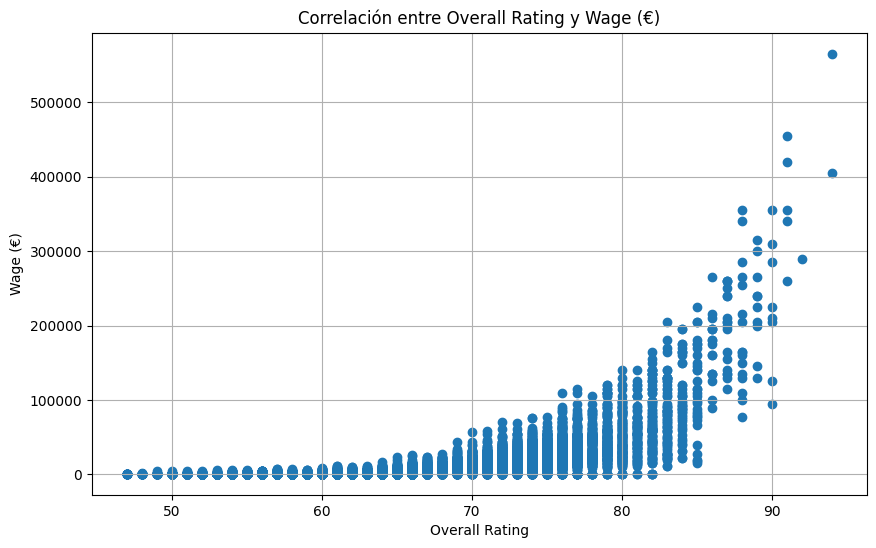

In [ ]:
# prompt: dame una grafica de correlacion entre wage_euro y overall_rating

import matplotlib.pyplot as plt

# ... (código anterior) ...

plt.figure(figsize=(10, 6))
plt.scatter(df['overall_rating'], df['wage_euro'])
plt.xlabel('Overall Rating')
plt.ylabel('Wage (€)')
plt.title('Correlación entre Overall Rating y Wage (€)')
plt.grid(True)
plt.show()


In [ ]:
# prompt: calcula la media, median y desviacion estandar del salario wage_euro de los futbolistas europeos por nationality

# Calculate the mean, median, and standard deviation of 'wage_euro' by 'nationality'
def analyze_salaries(df):
  """
  Calculates mean, median, and standard deviation of 'wage_euro' by 'nationality'.

  Args:
      df: Pandas DataFrame containing player data with 'nationality' and 'wage_euro' columns.

  Returns:
      Pandas DataFrame with the calculated statistics grouped by nationality,
      or None if an error occurs.
  """

  try:
    salary_stats = df.groupby('nationality')['wage_euro'].agg(['mean', 'median', 'std'])
    return salary_stats
  except KeyError as e:
    print(f"Error: Column {e} not found in the DataFrame.")
    return None
  except Exception as e:
    print(f"An error occurred during the analysis: {e}")
    return None


# Assuming 'df' is your DataFrame from the previous code
salary_stats_df = analyze_salaries(df)

#if salary_stats_df is not None:
salary_stats_df


,mean,median,std
nationality,,,
Afghanistan,1333.333333,1000.0,577.350269
Albania,6857.142857,3000.0,10417.085938
Algeria,18566.666667,7000.0,29707.253390
Andorra,1000.000000,1000.0,NaN
Angola,9769.230769,7000.0,11218.688620
...,...,...,...
Vietnam,1000.000000,1000.0,NaN
Wales,11984.375000,3500.0,34801.118720
Yemen,3000.000000,3000.0,NaN


In [ ]:
# prompt: del resultado anterior selcciona solo los paises europeos y muestrame las estadisticas

import pandas as pd

# ... (código anterior) ...

def analyze_european_salaries(df):
    """
    Analyzes salary statistics for European players.

    Args:
        df: DataFrame containing player data.

    Returns:
        DataFrame with salary statistics for European players, or None if an error occurs.
    """
    try:
        # List of European countries (you might need to expand this list)
        european_countries = ['England', 'Spain', 'Germany', 'France', 'Italy', 'Portugal', 'Netherlands', 'Belgium', 'Poland', 'Russia',  # Agrega más países según sea necesario
                             'Turkey', 'Ukraine', 'Sweden', 'Denmark', 'Norway', 'Finland', 'Ireland', 'Scotland', 'Wales','Austria', 'Switzerland', 'Greece']

        european_players = df[df['nationality'].isin(european_countries)]
        salary_stats = european_players.groupby('nationality')['wage_euro'].agg(['mean', 'median', 'std'])
        return salary_stats
    except KeyError as e:
        print(f"Error: Column '{e}' not found in the DataFrame.")
        return None
    except Exception as e:
        print(f"An error occurred during the analysis: {e}")
        return None

european_salary_stats = analyze_european_salaries(df)

#if european_salary_stats is not None:
european_salary_stats


,mean,median,std
nationality,,,
Austria,7697.986577,3000.0,12738.607347
Belgium,17344.827586,5000.0,42705.024273
Denmark,7192.546584,3000.0,15345.863306
England,9966.827503,3000.0,19224.167165
Finland,5432.835821,1000.0,10702.907960
France,14076.756757,4000.0,27168.775652
Germany,9656.380317,3000.0,22095.150676
Greece,7918.367347,1000.0,18222.945471
Italy,14184.732824,4000.0,23769.942451


La correlación entre value_euro y wage_euro es: 0.8564655642123894
Existe una fuerte correlación positiva entre el valor y el salario.


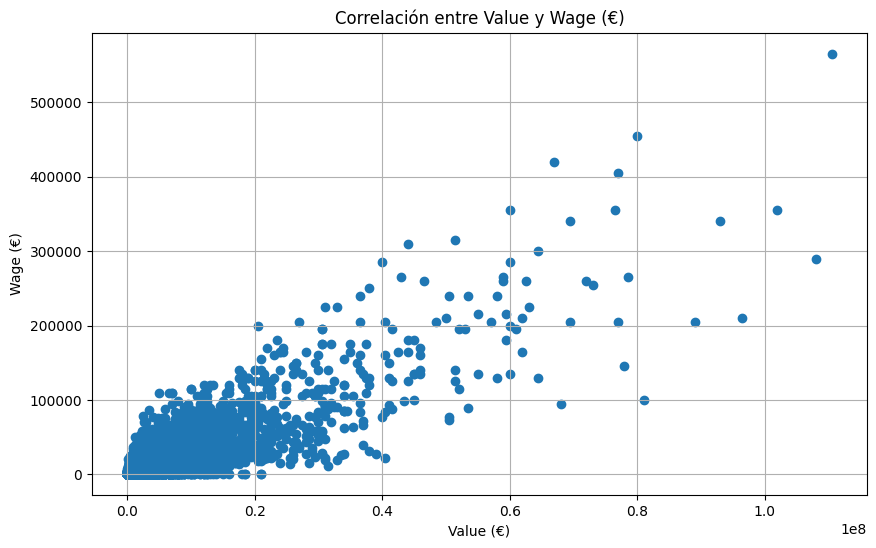

In [ ]:
# prompt: compara value_euro con el wage_euro¿hay correlacion?

import matplotlib.pyplot as plt
# ... (código anterior) ...

correlation_value_wage = df['value_euro'].corr(df['wage_euro'])
print(f"La correlación entre value_euro y wage_euro es: {correlation_value_wage}")

# Interpretación de la correlación
if correlation_value_wage > 0.5:
    print("Existe una fuerte correlación positiva entre el valor y el salario.")
elif correlation_value_wage > 0:
    print("Existe una correlación positiva entre el valor y el salario.")
elif correlation_value_wage < -0.5:
    print("Existe una fuerte correlación negativa entre el valor y el salario.")
elif correlation_value_wage < 0:
    print("Existe una correlación negativa entre el valor y el salario.")
else:
    print("No existe una correlación significativa entre el valor y el salario.")

plt.figure(figsize=(10, 6))
plt.scatter(df['value_euro'], df['wage_euro'])
plt.xlabel('Value (€)')
plt.ylabel('Wage (€)')
plt.title('Correlación entre Value y Wage (€)')
plt.grid(True)
plt.show()


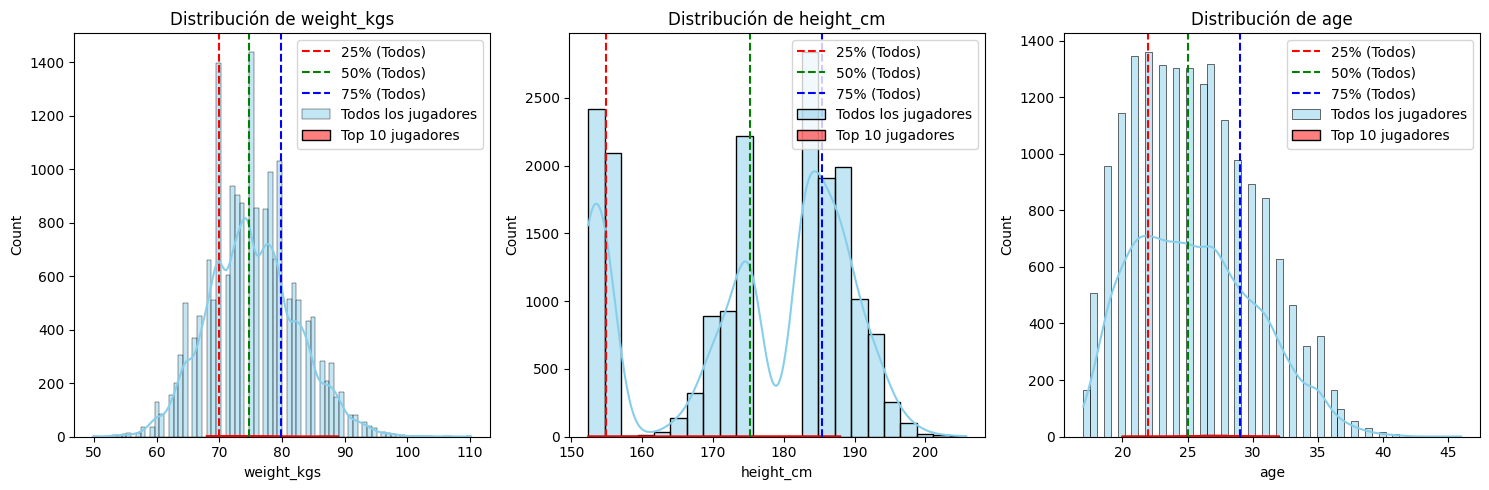


Percentiles para weight_kgs:
Jugador con weight_kgs = 72.1: Percentil 33.19
Jugador con weight_kgs = 68.0: Percentil 14.73
Jugador con weight_kgs = 69.9: Percentil 23.32
Jugador con weight_kgs = 88.9: Percentil 96.71
Jugador con weight_kgs = 76.2: Percentil 56.12
Jugador con weight_kgs = 74.8: Percentil 49.73
Jugador con weight_kgs = 73.0: Percentil 38.32
Jugador con weight_kgs = 86.2: Percentil 92.81
Jugador con weight_kgs = 71.2: Percentil 28.90
Jugador con weight_kgs = 73.0: Percentil 38.32

Percentiles para height_cm:
Jugador con height_cm = 170.18: Percentil 30.41
Jugador con height_cm = 175.26: Percentil 44.25
Jugador con height_cm = 154.94: Percentil 19.29
Jugador con height_cm = 187.96: Percentil 82.42
Jugador con height_cm = 172.72: Percentil 35.48
Jugador con height_cm = 152.4: Percentil 6.73
Jugador con height_cm = 152.4: Percentil 6.73
Jugador con height_cm = 182.88: Percentil 58.34
Jugador con height_cm = 175.26: Percentil 44.25
Jugador con height_cm = 175.26: Percentil 4

In [ ]:
# prompt: corrige el siguiente codigo para que grafique la distribucion de todos los datos  para cada categoria  peso,  estatura y edad. En cada grafico se debe mostrar la linea del percentil 25, 50 y 75 .Despues de eso debemos calcular en que percentil  se encuentran los 10 jugadores mas costosos para cada categoria:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ... (código anterior) ...

def analyze_top_players(df):
    try:
        top_10_players = df.sort_values('value_euro', ascending=False).head(10)
        columns_to_analyze = ['weight_kgs', 'height_cm', 'age']

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        for i, col in enumerate(columns_to_analyze):
            # Distribución de todos los datos para la categoría
            sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue", label="Todos los jugadores")

            # Distribución de los 10 mejores jugadores para la categoría
            sns.histplot(top_10_players[col], kde=True, ax=axes[i], color="red", label="Top 10 jugadores", alpha=0.5)

            axes[i].set_title(f'Distribución de {col}')

            #Percentiles para todos los jugadores
            percentiles = df[col].quantile([0.25, 0.5, 0.75])
            axes[i].axvline(percentiles[0.25], color='red', linestyle='--', label='25% (Todos)')
            axes[i].axvline(percentiles[0.5], color='green', linestyle='--', label='50% (Todos)')
            axes[i].axvline(percentiles[0.75], color='blue', linestyle='--', label='75% (Todos)')

            axes[i].legend()

        plt.tight_layout()
        plt.show()


        for col in columns_to_analyze:
            print(f"\nPercentiles para {col}:")
            for val in top_10_players[col]:
                percentile_rank = stats.percentileofscore(df[col], val)
                print(f"Jugador con {col} = {val}: Percentil {percentile_rank:.2f}")

    except KeyError as e:
        print(f"Error: La columna '{e}' no se encontró en el DataFrame.")
    except Exception as e:
        print(f"Ocurrió un error durante el análisis: {e}")

# ... (resto del código) ...

analyze_top_players(df)


In [ ]:
# prompt: Construye una tabla de contingencia entre la nacionalidad  (nacionality) y el pie preferido (preffered_foot).
# ¿Existen paises  donde el porcentaje de jugadores zurdos sea significativamente mayor?

import pandas as pd
# ... (código anterior) ...

# Assuming df is already loaded and accessible here
# This line is added to make sure df is defined within this scope
# If your df is loaded in another cell, you may need to execute that cell first
# or pass df as an argument to the current cell.

def analyze_foot_preference_by_nationality(df): # Added df as an argument
    """
    Analyzes the preferred foot of players by nationality and identifies countries
    with a significantly higher percentage of left-footed players.

    Args:
        df: DataFrame containing player data.

    Returns:
        None. Prints the contingency table and analysis results.
    """
    try:
        contingency_table = pd.crosstab(df['nationality'], df['preferred_foot'])
        print("Tabla de Contingencia (Nacionalidad vs. Pie Preferido):")
        print(contingency_table)

        # Calcular el porcentaje de zurdos por nacionalidad
        contingency_table['total'] = contingency_table.sum(axis=1)
        contingency_table['left_foot_percentage'] = (contingency_table['Left'] / contingency_table['total']) * 100

        # Ordenar por porcentaje de zurdos
        left_foot_percentage = contingency_table.sort_values(by='left_foot_percentage', ascending=False)
        print("\nPorcentaje de jugadores zurdos por nacionalidad (ordenados):")
        print(left_foot_percentage[['left_foot_percentage']])

        # Identificar países con un porcentaje de zurdos significativamente alto (umbral arbitrario)
        threshold = 15  # Ajustar este valor según sea necesario
        high_left_foot_countries = left_foot_percentage[left_foot_percentage['left_foot_percentage'] > threshold]
        print(f"\nPaíses con más del {threshold}% de jugadores zurdos:")
        print(high_left_foot_countries[['left_foot_percentage']])

        return contingency_table
    except KeyError as e:
        print(f"Error: Column '{e}' not found in the DataFrame.")
    except Exception as e:
        print(f"An error occurred during the analysis: {e}")

# Make sure 'df' is defined and accessible in this cell
# For example, if df was created in a previous cell, execute that cell first.
# Then you can call:

contingency_table = analyze_foot_preference_by_nationality(df) # Pass df to the function call

Tabla de Contingencia (Nacionalidad vs. Pie Preferido):
preferred_foot  Left  Right
nationality                
Afghanistan        1      2
Albania           13     29
Algeria           19     41
Andorra            0      1
Angola             3     10
...              ...    ...
Vietnam            0      1
Wales             28    102
Yemen              0      1
Zambia             1      9
Zimbabwe           5      8

[160 rows x 2 columns]

Porcentaje de jugadores zurdos por nacionalidad (ordenados):
preferred_foot        left_foot_percentage
nationality                               
United Arab Emirates                 100.0
Palestine                            100.0
New Caledonia                        100.0
Barbados                             100.0
Malta                                100.0
...                                    ...
South Sudan                            0.0
Korea DPR                              0.0
St Kitts Nevis                         0.0
St Lucia             

In [ ]:
contingency_table

preferred_foot,Left,Right,total,left_foot_percentage
nationality,,,,
Afghanistan,1,2,3,33.333333
Albania,13,29,42,30.952381
Algeria,19,41,60,31.666667
Andorra,0,1,1,0.000000
Angola,3,10,13,23.076923
...,...,...,...,...
Vietnam,0,1,1,0.000000
Wales,28,102,130,21.538462
Yemen,0,1,1,0.000000


In [ ]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# ... (código anterior) ...

# Eliminar filas con valores NaN en 'value_euro' o 'wage_euro'
df = df.dropna(subset=['value_euro', 'wage_euro'])

# Seleccionar las variables independientes (X) y la variable dependiente (y)
X = df[['wage_euro']]  # Variable independiente: salario del jugador
y = df['value_euro']   # Variable dependiente: valor del jugador

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# ... (resto del código) ...



LinearRegression()

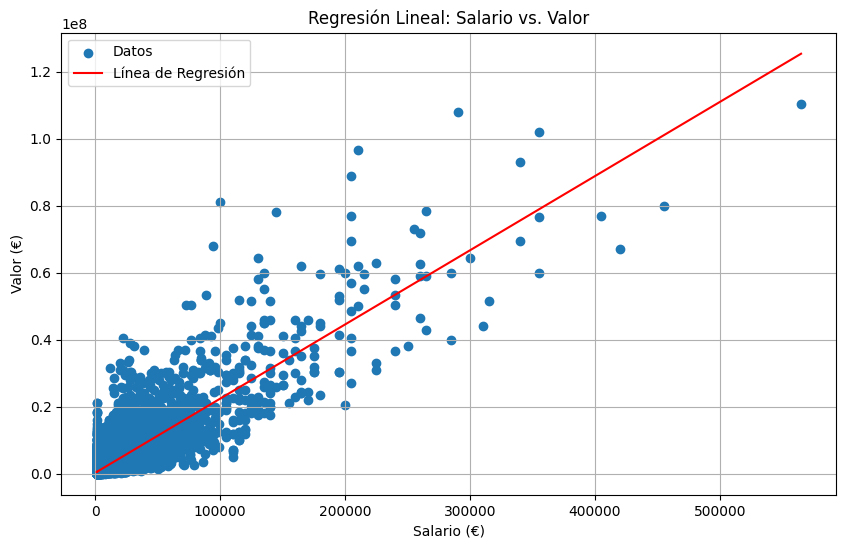

In [ ]:
# prompt: dame una visualizacion del modelo de regresion lineal creado anteriormente

import matplotlib.pyplot as plt
# ... (código anterior) ...

# Obtener los coeficientes del modelo
intercept = model.intercept_
slope = model.coef_[0]

# Crear la línea de regresión
y_pred = model.predict(X)

# Visualizar los datos y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Datos')
plt.plot(X, y_pred, color='red', label='Línea de Regresión')
plt.xlabel('Salario (€)')
plt.ylabel('Valor (€)')
plt.title('Regresión Lineal: Salario vs. Valor')
plt.legend()
plt.grid(True)
plt.show()

# ... (resto del código) ...


conclusion : La columna precio de fichaje no existe en la base de datos, por lo que  la regresion lineal anterior se hizo unicamente con la variable independiente wage_euro. Ademas se observa  una fuerte dependencia lineal entre value euro y wage euro.

In [ ]:
# prompt: Calcula la probabilidad de que un jugador frances sea seleccionado al azar de entre  todos los jugadores franceses. Has lo mismo para un jugador Italiano y Aleman. Para esto utiliza la columna nationality y filtra cada total de jugadores franceses (France), italianos (Italy) y alemanes (Germany), es decir, el calculo debe hacerse como 1/total_jugadores_franceses, 1/total_jugadores_italianos y 1/total_jugadores_alemanes.

def calculate_probabilities(df):
    """Calculates the probability of randomly selecting a player from France, Italy, and Germany."""
    try:
        # Count players from each nationality
        french_players = len(df[df['nationality'] == 'France'])
        italian_players = len(df[df['nationality'] == 'Italy'])
        german_players = len(df[df['nationality'] == 'Germany'])

        # Calculate probabilities
        prob_french = 1 / french_players if french_players > 0 else 0
        prob_italian = 1 / italian_players if italian_players > 0 else 0
        prob_german = 1 / german_players if german_players > 0 else 0

        print(f"Probability of selecting a French player: {prob_french}")
        print(f"Probability of selecting an Italian player: {prob_italian}")
        print(f"Probability of selecting a German player: {prob_german}")

    except KeyError as e:
        print(f"Error: Column '{e}' not found in the DataFrame.")
    except Exception as e:
        print(f"An error occurred during the calculation: {e}")

calculate_probabilities(df)


Probability of selecting a French player: 0.0010822510822510823
Probability of selecting an Italian player: 0.0015267175572519084
Probability of selecting a German player: 0.0008340283569641367


italia es el pais que tiene una probabilidad mas alta para un jugador  que es seleccionado al azar, su probabilidad es 0.0015 (0.15%).El  menos probable de ser escogido es un jugador Aleman 0.00083 (0.083%)

# Repaso

**1. Varianza**: Es una medida de la variabilidad de los datos de una variable (X, Y, Z, etc) alrededor del promedio de dichos datos. La varianza siempre está en unidades al cuadrado de la variable original.

Ejemplo:
  - Si variable es Edad en años, la Varianza estría en años$^2$.
  - Si variable es Altura en cm, la varianza estaría en cm$^2$.

La varianza se representa por la letra s al cuadrado:

$s^2$

**2. Desviación Estándar**: Es una medida de la variabilidad de los datos alredor del promedio pero en unidades fáciles de interpretar.

$s = \sqrt{s^2}$

Ejemplo: Variable Edad
  - Promedio: 25 años
  - Desviación estándar: 7 años

  La desviación estándar anterior indica que los datos de edad están dispersados unos 7 años al rededor de los 25 años, es decir, la mayoría de las edades están ente 25-7 = 18 años y 25+7 = 32 años.


¿Cómo calculo el **coeficiente de correlación lineal** entre dos variables X y Y?

$r = \sqrt{\dfrac{s^2_{xy}}{s^2_xs^2_y}}=\dfrac{s_{xy}}{s_xs_y}$

Donde
- $s^2_{xy}$ representa la covarianza entre las dos variables.
- $s^2_x$ representa la varianza de la variable X.
- $s^2_y$ representa la varianza de la variable Y.



**Ejemplo entre Peso y Altura**

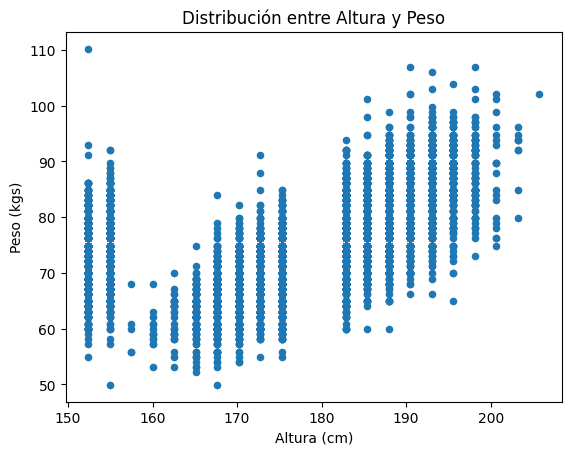

In [ ]:
# prompt: Grafica la distribución entre la columna height_cm y weight_kgs

import matplotlib.pyplot as plt

# Assuming df is already loaded as in the previous code

try:
  df.plot.scatter(x='height_cm', y='weight_kgs')
  plt.title('Distribución entre Altura y Peso')
  plt.xlabel('Altura (cm)')
  plt.ylabel('Peso (kgs)')
  plt.show()
except KeyError as e:
  print(f"Error: La columna {e} no existe en el DataFrame.")
except Exception as e:
  print(f"Error al generar la gráfica: {e}")


In [ ]:
# prompt: Calcula la covarianza entre x='height_cm' y y='weight_kgs'

# Calculate the covariance between 'height_cm' and 'weight_kgs'
try:
    covariance = df['height_cm'].cov(df['weight_kgs'])
    print(f"La covarianza entre 'height_cm' y 'weight_kgs' es: {covariance}")
except KeyError as e:
    print(f"Error: La columna '{e}' no se encontró en el DataFrame.")
except Exception as e:
    print(f"Ocurrió un error al calcular la covarianza: {e}")


La covarianza entre 'height_cm' y 'weight_kgs' es: 49.22502700856774


In [ ]:
# prompt: Ahora, calcular la mismva covarianza entre x='height_cm' y y='weight_kgs' pero de manera explicita mostrando el paso a paso de la formula de covarianza.

# Assuming df is already loaded as in the previous code

try:
    # 1. Calcular la media de 'height_cm' y 'weight_kgs'
    print("1. Calcular la media de 'height_cm' y 'weight_kgs'")
    mean_height = df['height_cm'].mean()
    mean_weight = df['weight_kgs'].mean()
    print("Promedio de 'height_cm' y 'weight_kgs'")
    print(f"Promedio de 'height_cm': {mean_height}")
    print(f"Promedio de 'weight_kgs': {mean_weight}")

    # 2. Calcular las diferencias entre cada valor y su media respectiva
    print("2. Calcular las diferencias entre cada valor y su media respectiva")
    diff_height = df['height_cm'] - mean_height
    diff_weight = df['weight_kgs'] - mean_weight
    print("Diferencias entre cada valor y su media respectiva")
    print(f"Diferencias de 'height_cm':\n{diff_height}")
    print(f"Diferencias de 'weight_kgs':\n{diff_weight}")

    # 3. Calcular el producto de las diferencias para cada par de valores
    print("3. Calcular el producto de las diferencias para cada par de valores")
    product_diff = diff_height * diff_weight
    print(f"Producto de las diferencias de 'height_cm' y 'weight_kgs':\n{product_diff}")

    # 4. Sumar los productos de las diferencias
    print("4. Sumar los productos de las diferencias")
    sum_product_diff = product_diff.sum()
    print(f"Suma de los productos de las diferencias: {sum_product_diff}")

    # 5. Dividir la suma de los productos de diferencias por la cantidad de datos menos 1 (n-1)
    print("5. Dividir la suma de los productos de diferencias por la cantidad de datos menos 1 (n-1)")
    covariance = sum_product_diff / (len(df) - 1)

    print(f"La covarianza entre 'height_cm' y 'weight_kgs' calculada de manera explicita es: {covariance}")

except KeyError as e:
    print(f"Error: La columna '{e}' no se encontró en el DataFrame.")
except Exception as e:
    print(f"Ocurrió un error al calcular la covarianza: {e}")


1. Calcular la media de 'height_cm' y 'weight_kgs'
Promedio de 'height_cm' y 'weight_kgs'
Promedio de 'height_cm': 174.94692102038542
Promedio de 'weight_kgs': 75.30104712041883
2. Calcular las diferencias entre cada valor y su media respectiva
Diferencias entre cada valor y su media respectiva
Diferencias de 'height_cm':
0        -4.766921
1       -20.006921
2        15.553079
3       -12.386921
4        13.013079
           ...    
17949     0.313079
17950     7.933079
17951    10.473079
17952     0.313079
17953    15.553079
Name: height_cm, Length: 17954, dtype: float64
Diferencias de 'weight_kgs':
0        -3.201047
1         0.898953
2         8.598953
3       -16.301047
4        13.598953
           ...    
17949    -0.501047
17950     4.498953
17951    14.498953
17952   -10.401047
17953     4.498953
Name: weight_kgs, Length: 17954, dtype: float64
3. Calcular el producto de las diferencias para cada par de valores
Producto de las diferencias de 'height_cm' y 'weight_kgs':
0      